In [1]:
import requests
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
from bs4 import BeautifulSoup

import pandas as pd
import csv
import time
import json
from pandas import json_normalize

In [2]:
'''
serviceKey 서비스키
brtcCode 광역시도 코드
signguCode 시군구 코드
numOfRows 페이지당 데이터 개수
pageNo 페이지 번호
'''

'\nserviceKey 서비스키\nbrtcCode 광역시도 코드\nsignguCode 시군구 코드\nnumOfRows 페이지당 데이터 개수\npageNo 페이지 번호\n'

### brtcCode = 광역시도 코드
11	서울특별시
26	부산광역시
27	대구광역시
28	인천광역시
29	광주광역시
30	대전광역시
31	울산광역시
36110	세종특별자치시
41	경기도
42	강원도
43	충청북도
44	충청남도
45	전라북도
46	전라남도
47	경상북도
48	경상남도
50	제주특별자치도

In [11]:
# 각 광역시도의 시군구 리스트

서울 = [110, 140, 170, 200, 215, 230, 260, 290, 305, 320, 350, 380, 410, 
      440, 470, 500, 530, 545, 560, 590, 620, 650, 680, 710, 740] # 서울 11
부산 = [110, 140, 270, 200, 230, 260, 290, 320, 350, 380, 410, 440, 470, 500, 530, 710] # 부산 26
대구 = [110, 140, 170, 200, 230, 260, 290, 710] # 대구 27
인천 = [110, 140, 170, 185, 200, 237, 245, 260, 710, 720] # 인천 28
광주 = [110, 140, 155, 170, 200] # 광주 29
대전 = [110, 140, 270, 200, 230] # 대전 30
울산 = [110, 140, 170, 200, 710] # 울산 31
경기 = [110, 111, 113, 115, 117, 130, 131, 133, 135, 150, 170, 171, 173, 190, 210, 220, 250, 270, 271, 273, 280, 281, 
       285, 287, 290, 310, 360, 370, 390, 410, 430, 450, 460, 461, 463,
       465, 480, 500, 550, 570, 590, 610, 630, 670, 800, 820, 830] # 경기 41
강원 = [110, 130, 150, 170, 190, 210, 230, 720, 730, 750, 760, 770, 780, 790, 800, 810, 820, 830] # 강원 42
충북 = [110, 130, 150, 270, 190, 210, 230, 720, 730, 750, 760, 770, 780, 790, 800, 810, 820, 830] # 충북 43
충남 = [130, 131, 133, 150, 180, 200, 210, 230, 250, 270, 710, 760, 770, 790, 800, 810, 825] # 충남 44
전북 = [110, 111, 113, 130, 140, 180, 190, 210, 710, 720, 730, 740, 750, 770, 790, 800] # 전북 45
전남 = [110, 130, 150, 170, 230, 710, 720, 730, 770, 780, 790, 800, 810, 820, 830, 840, 860, 870, 880, 890, 900, 910] # 전남 46
경북 = [110, 111, 113, 130, 150, 170, 190, 210, 230, 250, 280, 290, 720, 
      730, 750, 760, 770, 820, 830, 840, 850, 900, 920, 930, 940] # 경북 47
경남 = [120, 121, 123, 125, 127, 129, 170, 220, 240, 250, 270, 310, 330, 720, 730, 740, 820, 840, 850, 860, 870, 880, 890] # 경남 48
제주 = [110, 130] # 제주 50
# 세종 36, 110


In [12]:
api_key="vbUEsiJrUU%2BsrA6G1WFZRY96t6LNyEHI7D4pvyQhU0L70CA8Dg9MoNGjlZuCTyVmeTnNtNZ0W9kRW2u%2FYpaIPw%3D%3D"

url = 'https://data.myhome.go.kr/rentalHouseList'
brtcCode = '11' # 광역시도 변수
signguCode = 서울[0] # 시군구 변수
numOfRows = '1000'
pageNo = '1'

url = f'https://data.myhome.go.kr/rentalHouseList?serviceKey={api_key}&brtcCode={brtcCode}&signguCode={signguCode}&numOfRows={numOfRows}&pageNo={pageNo}'

# 사이트 요청 및 파싱
res = requests.get(url)
root = json.loads(res.text)
data = root['hsmpList']
df = json_normalize(data)
#df = df.drop(['numOfRows', 'pageNo','pnu','buldStleNm','heatMthdDetailNm','elvtrInstlAtNm'], axis=1)


# 지역별 데이터프레임 합치기
for i in 서울[1:]:
    brtcCode = '11' # 광역시도 변수
    numOfRows = '1000' 
    pageNo = '1'

    url = f'https://data.myhome.go.kr/rentalHouseList?serviceKey={api_key}&brtcCode={brtcCode}&signguCode={i}&numOfRows={numOfRows}&pageNo={pageNo}'
    
    # 사이트 요청 및 파싱
    res = requests.get(url)
    root = json.loads(res.text)
    data = root['hsmpList']
    df1 = json_normalize(data)
    # df1 = df1.drop(['numOfRows', 'pageNo','pnu','buldStleNm','heatMthdDetailNm','elvtrInstlAtNm'], axis=1)
    df = df.append(df1, ignore_index=True)

df

,numOfRows,pageNo,totalCount,hsmpSn,insttNm,brtcCode,brtcNm,signguCode,signguNm,hsmpNm,...,suplyCmnuseAr,houseTyNm,parkngCo,bassRentGtn,bassMtRntchrg,bassCnvrsGtnLmt,competDe,heatMthdDetailNm,buldStleNm,elvtrInstlAtNm
0,1000,1,152,31351683,LH서울,11,서울특별시,110,종로구,서울특별시 종로구,...,12.1124,오피스텔,0,600000,338000,0,NaN,NaN,NaN,NaN
1,1000,1,152,31351683,LH서울,11,서울특별시,110,종로구,서울특별시 종로구,...,12.1074,오피스텔,0,600000,312000,0,NaN,NaN,NaN,NaN
2,1000,1,152,31351683,LH서울,11,서울특별시,110,종로구,서울특별시 종로구,...,13.2757,오피스텔,0,600000,342000,0,NaN,NaN,NaN,NaN
3,1000,1,152,31351683,LH서울,11,서울특별시,110,종로구,서울특별시 종로구,...,13.2706,오피스텔,0,600000,368000,0,NaN,NaN,NaN,NaN
4,1000,1,152,31351683,LH서울,11,서울특별시,110,종로구,서울특별시 종로구,...,13.5241,오피스텔,0,600000,363000,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19915,1000,1,3529,31357831,SH공사,11,서울특별시,740,강동구,고덕강일공공주택지구8단지(임대),...,32.7400,아파트,692,277500000,0,0,20210210,지역난방,혼합식,전체동 설치
19916,1000,1,3529,31357831,SH공사,11,서울특별시,740,강동구,고덕강일공공주택지구8단지(임대),...,36.6800,아파트,692,300000000,0,0,20210210,지역난방,혼합식,전체동 설치
19917,1000,1,3529,31357513,SH공사,11,서울특별시,740,강동구,강동 리엔파크 11단지,...,13.6500,아파트,396,31960000,101000,0,20210215,지역난방,계단식,전체동 설치
19918,1000,1,3529,31357513,SH공사,11,서울특별시,740,강동구,강동 리엔파크 11단지,...,13.7000,아파트,396,31960000,101000,0,20210215,지역난방,계단식,전체동 설치


In [13]:
df = df.drop(['numOfRows', 'pageNo','pnu','buldStleNm','heatMthdDetailNm','elvtrInstlAtNm', 'bassCnvrsGtnLmt'], axis=1)
df1 = df.rename(columns={'totalCount':'전체결과수', 'hsmpSn':'단지 식별자','insttNm':'기관 명', 'brtcCode':'광역시도 코드', 'brtcNm':'광역시도 명', 
                         'signguCode':'시군구 코드', 'signguNm':'지역구 ', 'hsmpNm':'시군구', 'rnAdres':'주소', 'hshldCo':'세대수', 
                         'suplyTyNm':'공급유형', 'styleNm':'형 명', 'suplyPrvuseAr':'공급전용면적', 'suplyCmnuseAr':'공급공용면적', 
                         'houseTyNm':'주택유형', 'parkngCo':'주차수', 'bassRentGtn':'임대보증금', 'bassMtRntchrg':'월임대료', 
                         'bassMtRntchrg':'월임대료', 'competDe':'준공일자'})

df1.to_csv('공공임대주택단지_서울.csv', encoding='cp949')

In [10]:
# df2 = df1['주택유형'] == '아파트'
# result = df1[df2]
# result

,전체결과수,단지 식별자,기관 명,광역시도 코드,광역시도 명,시군구 코드,지역구,시군구,주소,세대수,형 명,styleNm,공급전용면적,공급공용면적,주택유형,주차수,임대보증금,월임대료,준공일자
86,152,31044811,SH공사,11,서울특별시,110,종로구,경희궁자이(돈의문1구역),서울특별시 종로구 송월길 130,308,50년임대,39.0561,39.0561,19.6373,아파트,501,53140000,179900,20170630
87,152,31044811,SH공사,11,서울특별시,110,종로구,경희궁자이(돈의문1구역),서울특별시 종로구 송월길 130,308,50년임대,42.1289,42.1289,19.9740,아파트,501,56610000,191600,20170630
88,152,31044811,SH공사,11,서울특별시,110,종로구,경희궁자이(돈의문1구역),서울특별시 종로구 송월길 130,308,50년임대,44.0260,44.0260,20.8796,아파트,501,59160000,200300,20170630
89,152,31044811,SH공사,11,서울특별시,110,종로구,경희궁자이(돈의문1구역),서울특별시 종로구 송월길 130,308,50년임대,54.1632,54.1632,26.1670,아파트,501,73070000,247300,20170630
114,152,30583298,SH공사,11,서울특별시,110,종로구,무악현대(무악1),서울특별시 종로구 통일로 246-11,550,50년임대,15,32.9300,19.8400,아파트,205,10600000,149200,19991101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19915,3529,31357831,SH공사,11,서울특별시,740,강동구,고덕강일공공주택지구8단지(임대),서울특별시 강동구 아리수로93나길 88,102,장기전세,74A,74.7700,32.7400,아파트,692,277500000,0,20210210
19916,3529,31357831,SH공사,11,서울특별시,740,강동구,고덕강일공공주택지구8단지(임대),서울특별시 강동구 아리수로93나길 88,102,장기전세,84A,84.8600,36.6800,아파트,692,300000000,0,20210210
19917,3529,31357513,SH공사,11,서울특별시,740,강동구,강동 리엔파크 11단지,서울특별시 강동구 고덕로98길 101,593,행복주택,17A,17.9700,13.6500,아파트,396,31960000,101000,20210215
19918,3529,31357513,SH공사,11,서울특별시,740,강동구,강동 리엔파크 11단지,서울특별시 강동구 고덕로98길 101,593,행복주택,17B,17.9800,13.7000,아파트,396,31960000,101000,20210215


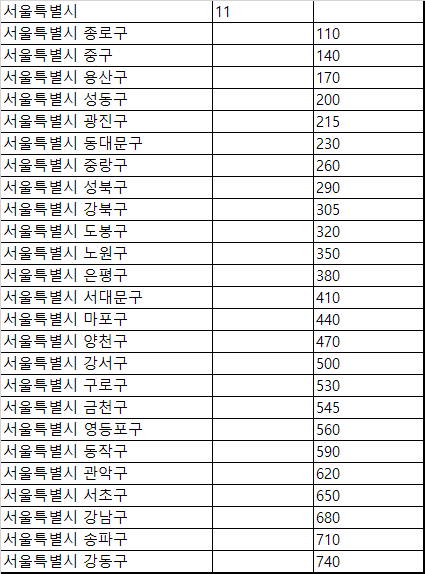
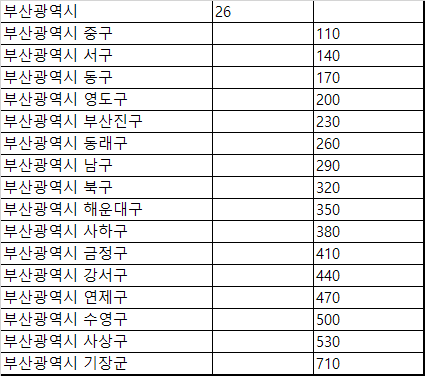
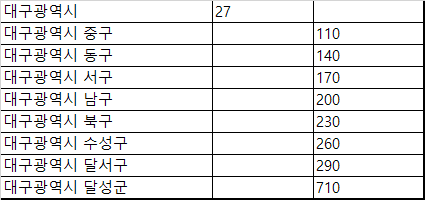
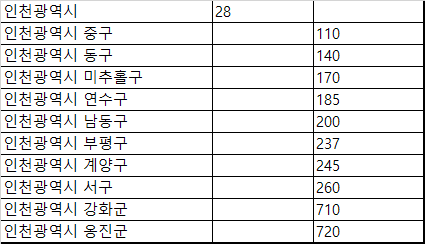
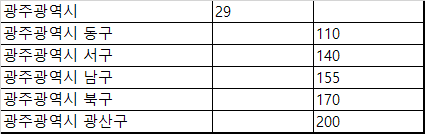
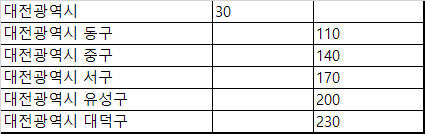
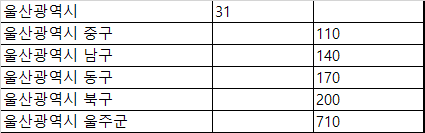

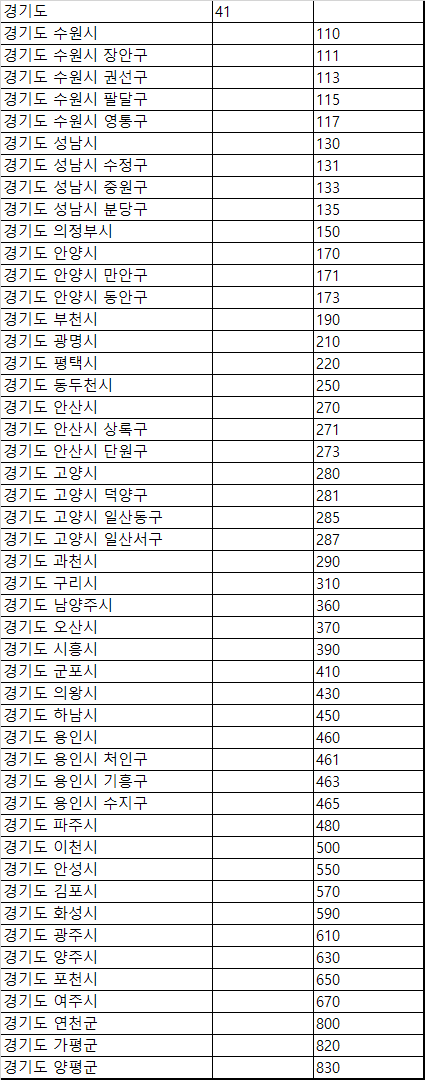
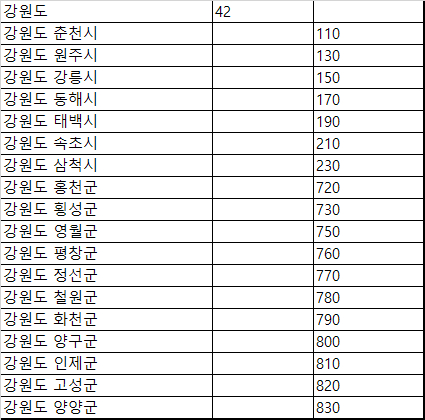
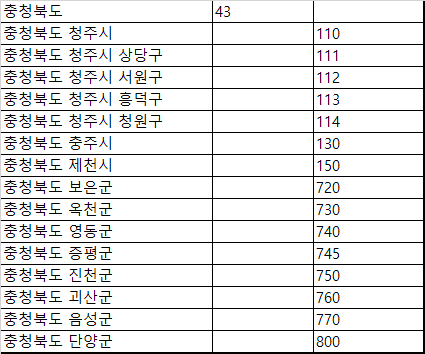
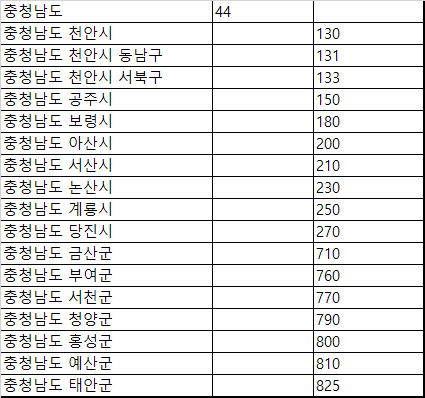
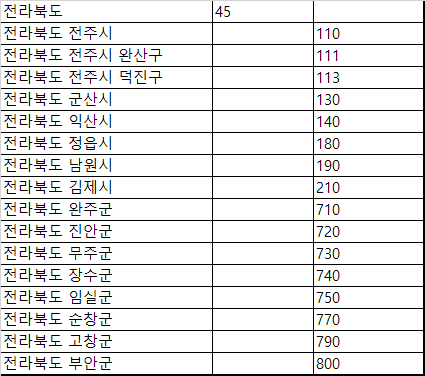
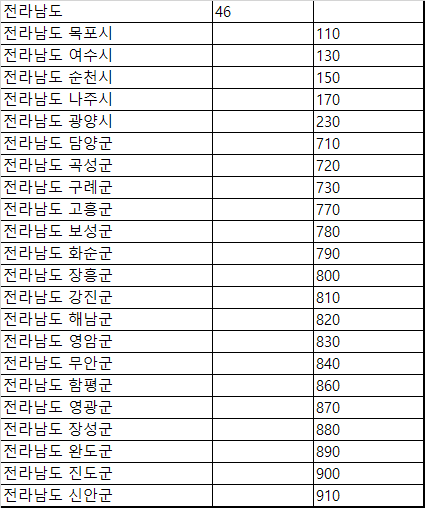
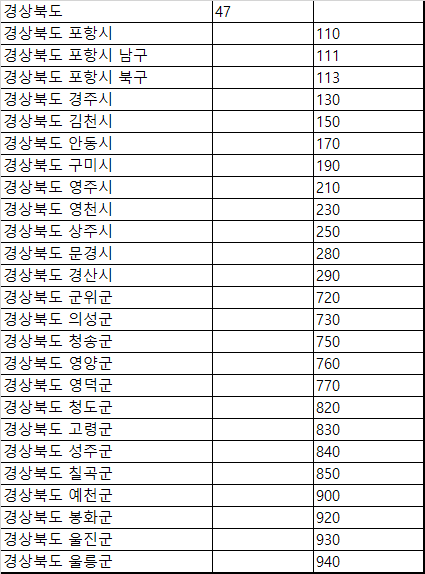
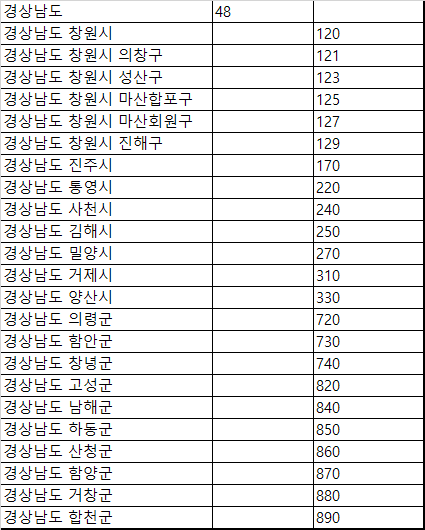
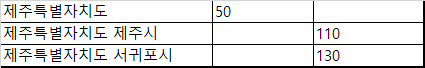

In [6]:
'''
code	코드	-	1	000	메시지 코드
numOfRows	페이지당 데이터 개수	-	1	10	조회될 목록의 페이지당 데이터 개수 (기본값:10)
pageNo	페이지 번호	-	1	1	조회될 페이지의 번호 (기본값:1)
totalCount	전체 결과수	-	1	29	전체 결과수
hsmpSn	단지 식별자	10	1	31106888	단지 식별자
insttNm	기관 명	100	0	SH공사	기관 명
brtcCode	광역시도 코드	2	1	11	광역시도 코드
brtcNm	광역시도 명	10	1	서울특별시	광역시도 명
signguCode	시군구 코드	3	1	140	시군구 코드
signguNm	시군구 명	10	1	중구	시군구 명
hsmpNm	단지 명	200	0	서울역 센트럴자이(만리2구역)	단지 명
rnAdres	도로명 주소	1000	1	서울특별시 중구 만리재로 175	도로명 주소
pnu	pnu	19	0	1114017400100370002	pnu
competDe	준공 일자	8	0	20170807	준공 일자
hshldCo	세대 수	10	0	192	세대 수
suplyTyNm	공급 유형 명	20	0	50년임대	공급 유형 명
styleNm	형 명	200	0	39.9541	형 명
suplyPrvuseAr	공급 전용 면적	19,9	0	39.9541	공급 전용 면적 (단위 : ㎡)
suplyCmnuseAr	공급 공용 면적	19,9	0	21.7274	공급 공용 면적 (단위 : ㎡)
houseTyNm	주택 유형 명	20	0	아파트	주택 유형 명
heatMthdDetailNm	난방 방식	50	0	개별난방	난방 방식
buldStleNm	건물 형태	50	0	복도식	건물 형태
elvtrInstlAtNm	승강기 설치여부	50	0	전체동 설치	승강기 설치여부
parkngCo	주차수	5	0	183	주차수
bassRentGtn	기본 임대보증금	13	0	34700000	기본 임대보증금
(단위 : 원)
bassMtRntchrg	기본 월임대료	13	0	149500	기본 월임대료
(단위 : 원)
bassCnvrsGtnLmt	기본 전환보증금	13	0	0	기본 전환보증금
(단위 : 원)
msg	메세지	-	0	OK	메시지

'''

'\ncode\t코드\t-\t1\t000\t메시지 코드\nnumOfRows\t페이지당 데이터 개수\t-\t1\t10\t조회될 목록의 페이지당 데이터 개수 (기본값:10)\npageNo\t페이지 번호\t-\t1\t1\t조회될 페이지의 번호 (기본값:1)\ntotalCount\t전체 결과수\t-\t1\t29\t전체 결과수\nhsmpSn\t단지 식별자\t10\t1\t31106888\t단지 식별자\ninsttNm\t기관 명\t100\t0\tSH공사\t기관 명\nbrtcCode\t광역시도 코드\t2\t1\t11\t광역시도 코드\nbrtcNm\t광역시도 명\t10\t1\t서울특별시\t광역시도 명\nsignguCode\t시군구 코드\t3\t1\t140\t시군구 코드\nsignguNm\t시군구 명\t10\t1\t중구\t시군구 명\nhsmpNm\t단지 명\t200\t0\t서울역 센트럴자이(만리2구역)\t단지 명\nrnAdres\t도로명 주소\t1000\t1\t서울특별시 중구 만리재로 175\t도로명 주소\npnu\tpnu\t19\t0\t1114017400100370002\tpnu\ncompetDe\t준공 일자\t8\t0\t20170807\t준공 일자\nhshldCo\t세대 수\t10\t0\t192\t세대 수\nsuplyTyNm\t공급 유형 명\t20\t0\t50년임대\t공급 유형 명\nstyleNm\t형 명\t200\t0\t39.9541\t형 명\nsuplyPrvuseAr\t공급 전용 면적\t19,9\t0\t39.9541\t공급 전용 면적 (단위 : ㎡)\nsuplyCmnuseAr\t공급 공용 면적\t19,9\t0\t21.7274\t공급 공용 면적 (단위 : ㎡)\nhouseTyNm\t주택 유형 명\t20\t0\t아파트\t주택 유형 명\nheatMthdDetailNm\t난방 방식\t50\t0\t개별난방\t난방 방식\nbuldStleNm\t건물 형태\t50\t0\t복도식\t건물 형태\nelvtrInstlAtNm\t승강기 설치여부\t50\t0\t전체동 설치\t승강기 설치여부\np